# Support Vector Machines

Most often used to solve classification problems but can also be used for regression. They technically perform binary classification only but with scikit-learn they can also do multiclass classification.

## How Support Vector Machines Work

SVMs find a decision boundary that cleanly separates classes by finding a line in 2D space, a plane in 3D space, or a hyperplane in higher-dimensional space that allows them to distinguish between different classes.

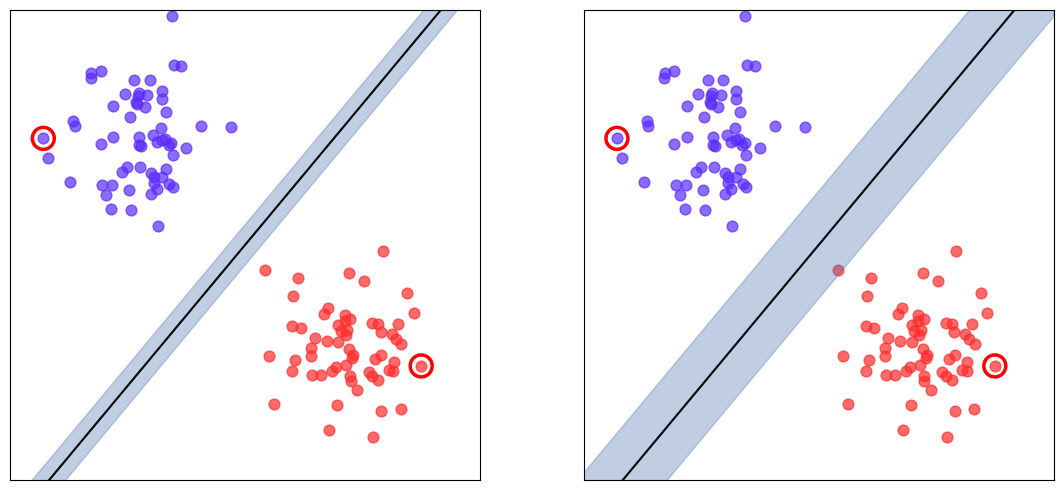

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(23)
n = 60

purple = np.random.randn(n, 2) * 0.6 + np.array([-1.5, 1.5])
red = np.random.randn(n,2) * 0.6 + np.array([1.5,-1.5])

circ_purple = purple[np.argmin(purple[:,0])]
circ_red = red[np.argmax(red[:,0])]

x = np.linspace(-3.5, 3.5, 200)
slope = 1.2
intercept = 0.0
y = slope * x + intercept

margin_narrow = 0.3
margin_wide = 0.8

def plot_panel(ax, margin):
    ax.scatter(purple[:,0], purple[:,1], color='#5b2cff', s=60, alpha=0.7)
    ax.scatter(red[:,0], red[:,1], color='#ff2d2d', s=60, alpha=0.7)

    ax.plot(x, y, color="black", linewidth=1.5)
    ax.fill_between(x, slope * x + intercept - margin, slope * x + intercept + margin, color='#4c72b0', alpha=0.35)
    ax.scatter([circ_purple[0], circ_red[0]],[circ_purple[1], circ_red[1]], facecolors="none", edgecolors="red", s=250, linewidths=2.5)

    ax.set_xlim(-3.5, 3.5)
    ax.set_ylim(-3.5, 3.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_panel(axes[0], margin_narrow)
plot_panel(axes[1], margin_wide)

plt.tight_layout()
plt.show()

SVMs support a regularization parameter usually reffered to as C that can be adjusted to loosen or tighten the fit. Lower values of C produce a wider margin with more errors on either side of the decision boundary, while higher values yield a tighter fit to the training data with a correspondingly thinner margin and fewer errrors. The optimal value of C varies by dataset.

What makes SVMs special are kernels, some of which add dimensions to data to find boundaries that don't exist at lower dimensions. For example in some cases you can't draw a line that separates the two classes but if you add a third dimension whose value is based on a point's distance from the center then you can slide a plane between the two classes. THe principle at work is Cover's theorem which states that the data that isn't linearly separable might be linearly separable if projected into higher-dimensional space using a nonlinear transformation.

## Kernels

There are several general-purpose kernels:

1. Linear kernel - doesn't add dimensions, it works well with data that is linearly separable.
2. RBF kernel - projects the x and y values into a gihter-dimensional space and fins a hyperplane that cleanly separates the purple from the red dots.

The RBF kernel didn't add a z to every x and y, it effectively projected the data points into a space with an infinite number of dimensions.